In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score

In [3]:
train=pd.read_csv('/content/drive/MyDrive/Asignments_DS/SalaryData_Train.csv')
train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
test=pd.read_csv('/content/drive/MyDrive/Asignments_DS/SalaryData_Test.csv')
test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
train1 = train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
test1 = test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#Scaling and Doing PCA

In [7]:

#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(train1)
train_norm = sc.transform(train1)
train_norm                     #Normalised dataset

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [8]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(test1)
test_norm = sc.transform(test1)
test_norm                     #Normalised dataset

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [9]:

from sklearn.decomposition import PCA

train_pca = PCA(n_components = 102)
train_pca_values = train_pca.fit_transform(train_norm)
train_pca_values

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
        -2.69489445e-15, -1.31715695e-15,  2.67291392e-15],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
        -4.33952133e-16,  1.64051157e-15,  1.45952908e-19],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
        -1.11151528e-15, -1.27433761e-15,  8.67282852e-17],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
         3.89318516e-17,  4.53755982e-17,  2.98585287e-18],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
         1.28861398e-17, -7.79288934e-17,  3.35633045e-16],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
        -2.54540415e-16,  2.93934078e-17,  1.12910234e-16]])

In [10]:
from sklearn.decomposition import PCA

test_pca = PCA(n_components = 102)
test_pca_values = test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
        -4.12246730e-16,  1.88910215e-15, -1.30513877e-15],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -1.45670352e-15,  7.43228843e-15, -1.20326916e-15],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
        -1.18038672e-15, -3.48232927e-16,  4.27025595e-16],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -1.04759012e-16, -3.18029947e-17,  5.15032905e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
        -4.86002559e-16, -6.64694584e-17,  7.42939851e-17],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         5.41400865e-17, -2.05320433e-17, -1.42409666e-17]])

In [11]:
# The amount of variance that each PCA explains is 
var = train_pca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

In [12]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

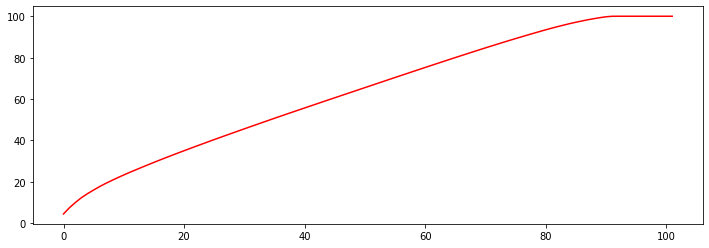

In [13]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

Selecting first 90 PC from 102 PC's

In [15]:
finaltrain = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,1.186566,-0.095880,-0.791379,-0.168112,0.770322,0.821914,-0.429108,0.707339,1.685104,0.532840,0.457135,1.901529,1.068039,-1.043522,0.255552,0.183786,-0.539427,0.597866,-0.986524,-1.003474,0.228597,0.565068,-0.806619,0.233876,0.764601,0.069137,-1.575187,-0.268439,0.114647,0.481383,...,0.147185,0.247990,0.292476,-0.386638,-0.208135,0.639948,-0.629738,-0.389636,0.253520,0.220188,0.818415,0.570856,-0.198405,-0.123871,0.217685,-0.248897,0.359581,-0.420036,-0.509760,-0.149714,0.921683,0.145096,0.058551,0.812602,-1.370520,-0.483078,0.269461,0.819872,0.815573,-0.255896,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,0.913161,-1.267228,-0.068247,-0.375389,-1.115078,-0.127460,-0.245849,1.675855,0.208498,0.145624,-0.441907,-0.073924,0.787591,-0.644091,-0.668810,0.205215,-0.085066,-0.257261,0.151661,-0.479364,0.155114,-0.093587,-0.291091,-0.591082,0.616023,-0.150287,-0.550196,-0.021884,0.673508,0.346428,...,0.088830,0.105344,0.287717,0.094522,-0.197380,0.179803,-0.416964,0.141439,0.388634,-0.235716,-0.198526,-0.068005,-0.112083,0.426343,0.185978,0.318975,0.501310,0.536221,-0.229764,-0.081091,-0.553206,0.151647,-0.131806,0.763639,0.184523,0.648675,0.443763,-0.559237,-1.312490,-1.269611,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,0.232760,-0.098170,0.609090,-0.276173,1.094547,-0.145317,-0.124076,0.336301,-0.342610,-0.593120,0.794959,-1.160569,0.096023,0.126787,0.148564,0.126825,0.189287,1.168987,-1.119507,-0.530190,-1.346666,-1.037846,-0.007209,-0.713255,0.492990,0.519508,-0.148044,1.742328,0.152793,0.063863,...,0.188127,0.152779,0.306485,0.666196,-0.174922,-0.086296,-0.011564,-0.159668,0.337896,0.847718,-0.616416,-0.845412,-0.662326,0.389742,-1.297318,-0.485820,0.155174,1.511826,-0.754774,-0.513842,0.243669,0.409598,0.439645,-0.489745,-0.459984,-0.173296,0.779919,-0.305886,-0.354062,0.196599,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,-1.270185,-1.110916,0.072641,-0.854702,0.517616,-0.033259,0.479259,1.673471,-0.114698,-1.011821,1.279629,-1.944392,0.132963,0.426710,0.213681,1.061753,1.084299,2.295362,-0.684054,-1.484474,-0.830871,0.086124,-1.126337,-0.574091,1.517830,0.461143,0.096296,0.287163,0.912333,-1.260293,...,-0.303161,-0.301677,0.586525,0.942389,-0.117736,0.130009,-0.734145,0.401835,0.435170,0.118628,0.176339,-0.780041,-0.721228,-1.135662,-1.582701,-0.610704,-0.584729,1.723296,-1.554775,0.081771,-0.085389,-0.396193,0.141780,-0.132632,-0.437630,-0.031481,0.139769,-0.217241,1.700981,0.091543,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,2.229671,0.389308,0.849733,-0.673616,-2.087810,1.737812,0.037901,-0.768008,0.197508,-3.078363,1.915936,-0.617250,0.410046,-1.160743,0.565308,-1.962727,0.156583,-0.705695,1.028164,0.685652,2.130832,-0.175361,1.886995,2.309326,0.625238,4.710673,0.023366,-0.921723,-2.201614,2.812071,...,-0.457730,1.071776,0.121029,-2.555717,0.396673,-2.336265,-2.296063,-2.451800,4.085069,0.185275,2.186742,-6.844351,-0.044532,-0.948143,-0.970746,0.195391,1.341979,3.082873,-0.895626,-0.284999,0.339503,-0.229652,1.137076,-0.192310,1.086882,0.888559,-1.081101,-0.786958,2.960761,-0.937974,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.40981

In [16]:
finaltest = pd.concat([pd.DataFrame(test_pca_values[:,0:90]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,-0.434481,-0.461663,0.022485,0.174200,-0.108225,-0.366826,0.316743,0.766410,-1.860169,-0.214581,-1.615495,-0.127885,0.685508,-0.290398,-0.249030,-0.970312,-0.748916,-0.624830,1.293059,0.756395,0.798905,0.439894,-1.081467,1.131500,-0.606926,-0.213589,1.786224,-0.451722,1.276190,-0.963246,...,-0.007825,-0.374519,-0.053152,0.750694,0.322315,0.419299,0.044379,-0.378321,1.387529,-0.189149,0.709680,-0.005173,0.166675,0.778293,-1.202167,-0.998648,-1.086893,0.606243,0.715932,-0.437518,0.446450,1.018527,1.127596,0.407497,0.261528,-0.650325,-0.228799,0.356352,-0.225201,-0.272082,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,0.926210,0.138613,1.461081,-0.689452,-1.075596,0.242097,0.022973,0.212038,-0.422123,-0.978493,-0.170319,-0.071589,-1.175655,0.279833,0.133843,0.244355,-0.259050,-0.126152,-0.303087,-0.241597,0.307409,-0.793390,0.245320,0.364899,0.021965,0.362114,0.729195,-0.485221,-0.268575,0.153857,...,-0.018202,-0.058352,0.012415,-0.250868,0.228570,-0.100305,-0.401271,0.196084,-0.001640,-0.580634,-0.650071,-0.417629,0.022130,0.330419,0.247932,0.506521,0.055502,0.480071,-0.326907,-0.413038,0.528404,0.159801,0.180905,0.789744,0.299662,0.410376,-0.517617,-0.464895,2.848202,-0.508174,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,-0.751138,-1.609546,-1.548367,0.395450,-2.268555,1.035974,0.106499,-1.635269,0.061653,2.270575,-1.610053,0.069685,-1.858790,-0.014832,1.317332,-1.397114,-1.973090,-0.073379,0.407395,-2.333953,-1.009130,1.128816,-0.187518,1.883914,0.241803,-0.445655,-1.188835,-1.520560,0.436772,0.130171,...,0.055137,-0.019973,-0.275708,-0.105688,0.489427,-0.898423,-0.651856,0.411493,0.387770,-1.051001,0.745423,0.556285,-0.321495,-0.239847,0.184061,1.493522,0.134068,1.093761,0.695311,0.378151,0.306923,-0.353530,-0.234766,1.030329,-0.540395,2.009157,-0.122343,-0.413787,-0.392672,0.311378,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,-1.109092,-0.067346,1.061369,0.286496,1.173708,-0.010478,-0.650107,-0.790228,-0.766915,-0.958071,-2.232951,0.420370,0.409215,0.154167,-0.028544,-0.446167,-0.068222,0.336419,1.129467,0.008281,0.089512,-0.035882,-0.396688,0.461214,-0.027158,0.487281,0.353454,0.095462,-0.176236,-0.146928,...,0.091357,0.057526,0.061161,0.362946,0.148386,0.167551,0.502786,-0.025857,0.246983,-0.095404,-0.074340,-0.746006,-0.159692,0.490677,-0.168480,-0.477245,-1.163776,0.334742,-0.249793,-0.964184,0.348592,0.357163,0.041896,0.251008,-0.420671,-0.273517,0.315903,0.531999,-0.236518,-0.744619,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,-1.469037,-1.753091,-0.253798,0.038552,1.039078,0.574328,0.027060,0.969518,0.052837,0.989367,0.537036,-1.132455,1.527210,0.500497,1.855974,1.875843,-0.582288,0.543698,0.339405,0.172979,-1.035186,-0.084044,-0.964003,-0.243646,1.837188,0.231022,-1.917248,0.197942,-0.057793,-0.085335,...,-0.323279,-0.220078,-0.335412,-0.718469,-0.456859,-1.011761,0.546873,-0.885107,0.041279,0.626951,-0.932159,0.946684,-1.349547,-0.343745,0.588716,-0.075018,-0.781053,0.900488,-1.270883,0.046173,0.136922,0.171868,-0.446295,-0.353422,-0.260914,0.372123,-0.428688,-0.462618,0.904219,-0.571625,-0.341200,0.427165,0.069133,-0.864467,0.492

In [17]:
#Since the training dataset is huge, we'll use some part of it for the training purpose, to reduce time consumed.
array = finaltrain.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

#SVM Classification

In [18]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_

({'C': 10, 'kernel': 'linear'}, 0.8220000000000001)

In [20]:
#Since the testing dataset is huge, we'll use some part of it for the test purpose, to reduce the time consumed.
x = finaltest.values[0:1000,0:90]
y = finaltest.values[0:1000,90]

In [21]:

#SVM Clasification
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.846
